In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.linear_model import LinearRegression

train_df = pd.read_csv('data (1).csv', sep=',', header=0)
test_df = pd.read_csv('test_data (1).csv', sep=',', header=0)

train_df.head()

,Period,US dollar
0,9/10/2020,1.1795
1,8/10/2020,1.1765
2,7/10/2020,1.1770
3,6/10/2020,1.1795
4,5/10/2020,1.1768


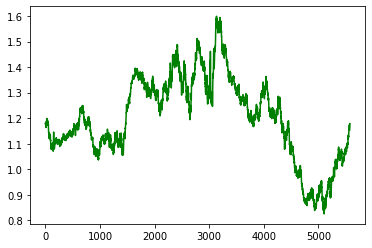

In [35]:
plt.plot(train_df['US dollar'],color='g')

In [36]:
# train
# Edit date and conversion to columns
train_df['Period'] = pd.to_datetime(train_df['Period']) 
train_df['year'] = train_df['Period'].dt.year 
train_df['month'] = train_df['Period'].dt.month  
train_df['day'] = train_df['Period'].dt.day 
train_df.head() 

,Period,US dollar,year,month,day
0,2020-09-10,1.1795,2020,9,10
1,2020-08-10,1.1765,2020,8,10
2,2020-07-10,1.1770,2020,7,10
3,2020-06-10,1.1795,2020,6,10
4,2020-05-10,1.1768,2020,5,10


Text(0.5, 0, 'Years')

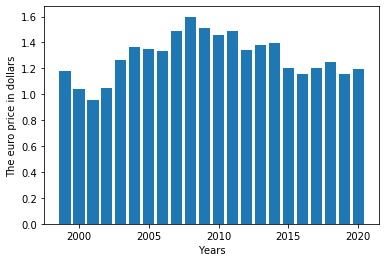

In [37]:
plt.bar(train_df['year'],train_df['US dollar'])
plt.ylabel('The euro price in dollars')
plt.xlabel('Years')


In [38]:
# test
# Edit date and conversion to columns
test_df['Period'] = pd.to_datetime(test_df['Period']) 
test_df['year'] = test_df['Period'].dt.year
test_df['month'] = test_df['Period'].dt.month  
test_df['day'] = test_df['Period'].dt.day 
test_df.head()

,Period,year,month,day
0,2021-01-01,2021,1,1
1,2021-02-01,2021,2,1
2,2021-03-01,2021,3,1
3,2021-04-01,2021,4,1
4,2021-05-01,2021,5,1


In [39]:
x=train_df[['year','month','day']] # features
y=train_df['US dollar']

regr=LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1).fit(x,y)
predict=regr.predict([[2020,12,10]]) # predict by date 2020-12-10
print('the price of the euro : ',predict)
print ('score',round(regr.score(x,y),4)) # score


the price of the euro :  [1.27373756]
percent 0.0681


In [64]:
# train and test
y = train_df["US dollar"]

features = ["year", "month", "day"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])


In [65]:
#x=train_df[['year','month','day']] # features
#y=train_df['US dollar']

#Applying Linear Regression Model 

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X, y)


print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X, y))


#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.0680862614875769
Predicted Value for Linear Regression is :  [1.2754308  1.27585801 1.27628522 1.27671242 1.27713963 1.27756684
 1.27799404 1.27842125 1.27884846 1.27927566]


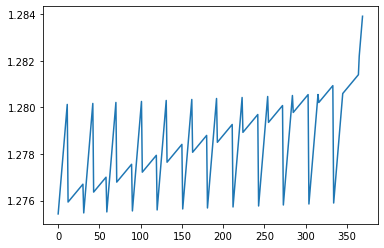

In [66]:
plt.plot(y_pred)

In [67]:
SVM = svm.LinearSVC()
SVM.fit(X, y)
SVM.predict(X_test)
round(SVM.score(X,y), 4)

ValueError: Unknown label type: 'continuous'

In [68]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
LR.fit(X, y) 
LR.predict(X_test) # prediction value
round(LR.score(X,y),4) # accuracy to first 4 number


ValueError: Unknown label type: 'continuous'

In [69]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(1, 5), random_state=0)
NN.fit(X, y)
NN.predict(X_test) # prediction value
round(NN.score(X,y), 4)

ValueError: Unknown label type: (array([1.1795, 1.1765, 1.177 , ..., 1.1743, 1.179 , 1.1789]),)

In [73]:
LR = LogisticRegression(random_state=3, solver='lbfgs', multi_class='ovr').fit(X, y) # 
LR.predict(X_test) # prediction value
round(LR.score(X,y),4) # accuracy to first 4 number

ValueError: Unknown label type: 'continuous'

In [72]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(1, 5), random_state=0)
NN.fit(X, y)
NN.predict(X_test)# prediction value
round(NN.score(X,y), 4)

ValueError: Unknown label type: (array([1.1795, 1.1765, 1.177 , ..., 1.1743, 1.179 , 1.1789]),)